In [40]:
# this cell is to process the data. It will read the image and cut it, read the landmark, and then store it.
# the imgs in dataset is be cut at the cat face.
import random
import sys
#import dlib
import cv2
import os
import pandas as pd
import numpy as np

img_size = 224
dirname = 'CAT_06'
base_path = 'cats/%s' % dirname
file_list = sorted(os.listdir(base_path))
#random.shuffle(file_list)
#print(file_list)

#only imgs and lmks is used
dataset = {
    'imgs': [],
    'lmks': [],
    'bbs': []
}


def resize_img(im):
    old_size = im.shape[:2]  # old_size is in (height, width) format
    ratio = float(img_size) / max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # new_size should be in (width, height) format
    im = cv2.resize(im, (new_size[1], new_size[0]))
    delta_w = img_size - new_size[1]
    delta_h = img_size - new_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                value=[0, 0, 0])
    return new_im, ratio, top, left


for f in file_list:
    if '.cat' not in f:
        continue

    # read landmarks
    pd_frame = pd.read_csv(os.path.join(base_path, f), sep=' ', header=None)
    landmarks = (pd_frame.to_numpy()[0][1:-1]).reshape((-1, 2))
    bb = np.array([np.min(landmarks, axis=0), np.max(
        landmarks, axis=0)]).astype(np.int)
    center = np.mean(bb, axis=0)
    face_size = max(
        np.abs(np.max(landmarks, axis=0) - np.min(landmarks, axis=0)))
    new_bb = np.array([
        center - face_size * 0.6,
        center + face_size * 0.6
    ]).astype(np.int)
    new_bb = np.clip(new_bb, 0, 99999)
    new_landmarks = landmarks - new_bb[0]

    # load image
    img_filename, ext = os.path.splitext(f)

    img = cv2.imread(os.path.join(base_path, img_filename))

    new_img = img[new_bb[0][1]:new_bb[1][1], new_bb[0][0]:new_bb[1][0]]

    # resize image and relocate landmarks
    img, ratio, top, left = resize_img(new_img)
    new_landmarks = ((new_landmarks * ratio) +
                     np.array([left, top])).astype(np.int)

    dataset['imgs'].append(img)
    dataset['lmks'].append(new_landmarks.flatten())
    dataset['bbs'].append(new_bb.flatten())

    # for l in new_landmarks:
    #   cv2.circle(img, center=tuple(l), radius=1, color=(255, 255, 255), thickness=2)

    # cv2.imshow('img', img)
    # if cv2.waitKey(0) == ord('q'):
    #   sys.exit(1)

np.save('dataset/lmks_%s.npy' % dirname, np.array(dataset))


In [60]:
#the cell will store imgs, lmks, bbs, bbs is the box
import random
import cv2
import os
import pandas as pd
import numpy as np

img_size = 224
dirname = 'CAT_06'
base_path = 'cats/%s' % dirname
file_list = sorted(os.listdir(base_path))
#random.shuffle(file_list)

dataset = {
    'imgs': [],
    'lmks': [],
    'bbs': []
}


def resize_img(im):
    old_size = im.shape[:2]  # old_size is in (height, width) format
    ratio = float(img_size) / max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # new_size should be in (width, height) format
    im = cv2.resize(im, (new_size[1], new_size[0]))
    delta_w = img_size - new_size[1]
    delta_h = img_size - new_size[0]
    top, bottom = delta_h // 2, delta_h - (delta_h // 2)
    left, right = delta_w // 2, delta_w - (delta_w // 2)
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
                                value=[0, 0, 0])
    return new_im, ratio, top, left


for f in file_list:
    if '.cat' not in f:
        continue

    # read landmarks
    pd_frame = pd.read_csv(os.path.join(base_path, f), sep=' ', header=None)
    landmarks = (pd_frame.to_numpy()[0][1:-1]).reshape((-1, 2))

    # load image
    img_filename, ext = os.path.splitext(f)

    img = cv2.imread(os.path.join(base_path, img_filename))

    # resize image and relocate landmarks
    img, ratio, top, left = resize_img(img)
    landmarks = ((landmarks * ratio) + np.array([left, top])).astype(np.int)
    bb = np.array([np.min(landmarks, axis=0), np.max(landmarks, axis=0)])

    dataset['imgs'].append(img)
    dataset['lmks'].append(landmarks.flatten())
    dataset['bbs'].append(bb.flatten())

    # for l in landmarks:
    #   cv2.circle(img, center=tuple(l), radius=1, color=(255, 255, 255), thickness=2)

    # cv2.imshow('img', img)
    # if cv2.waitKey(0) == ord('q'):
    #   break

np.save('dataset/%s.npy' % dirname, np.array(dataset))


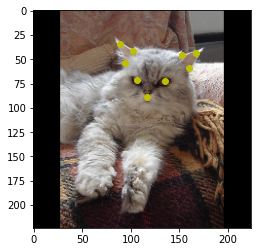

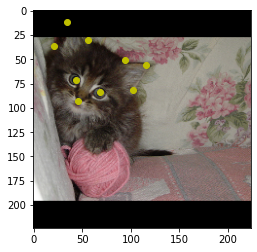

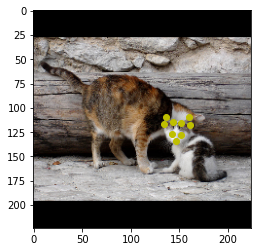

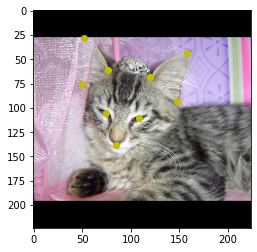

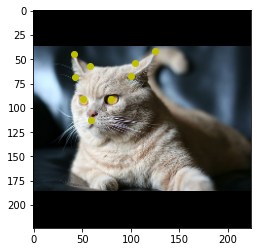

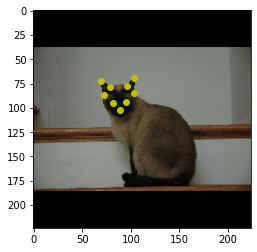

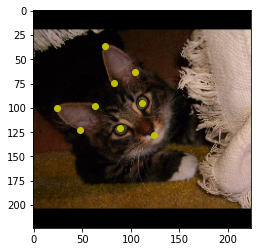

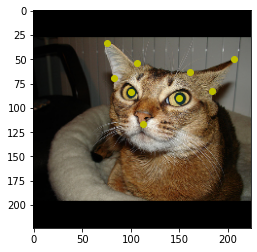

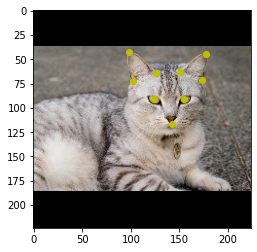

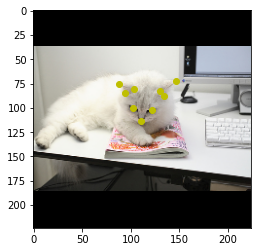

In [55]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
data_00 = np.load('dataset/CAT_00.npy',allow_pickle=True)
imgs = data_00.item().get('imgs')
lmks = data_00.item().get('lmks')
for i in range(0,10):
    im = imgs[i]
    im = im[...,::-1]
    img = (Image.fromarray(im, 'RGB'))
    
    lmk = lmks[i]
    #print(lmk)
    plt.figure()
    for i in range(0,18,2):
        plt.plot(lmk[i], lmk[i+1],'yo')
    plt.imshow(img)
